# Characterization of Discrete Systems in the Spectral Domain

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## The Transfer Function

Different time-domain representations are used to characterize linear time-invariant (LTI) discrete systems. For instance, the constant coefficients of [difference equations](../discrete_systems_time_domain/difference_equation.ipynb) and the [impulse response](../discrete_systems_time_domain/impulse_response.ipynb). The [transfer function](../discrete_systems_time_domain/eigenfunctions.ipynb#Transfer-Function) denotes the complex factor $H(z)$ an eigenfunction $z^k$ at the input of an LTI system is weighted with when passing through the system. Since the $z$-transform decomposes discrete signals with respect to these eigenfunctions, the transfer function constitutes a representation of an LTI system in the spectral domain (e.g. discrete (time) Fourier domain). The links between the transfer function and the time-domain representations of LTI systems are discussed in the following.

### Relation to Impulse Response and In-/Output Signal

It was already outlined in the context of the [convolution theorem of the $z$-transform](../z_transform/theorems.ipynb#Convolution-Theorem) and [discrete-time Fourier transform](../discrete_time_fourier_transform/theorems.ipynb#Convolution-Theorem), that an LTI system can be represented equivalently in the temporal and spectral domain. In the temporal domain the output $y[k]$ of a discrete LTI system is given by convolving the input signal $x[k]$ with the [impulse response](../discrete_systems_time_domain/impulse_response.ipynb) $h[k]$ of the system

\begin{equation}
y[k] = x[k] * h[k]
\end{equation}

Applying the convolution theorem of the $z$-transform yields

\begin{equation}
Y(z) = X(z) \cdot H(z)
\end{equation}

where $X(z) = \mathcal{Z} \{ x[k] \}$ and $Y(z) = \mathcal{Z} \{ y[k] \}$ are the $z$-transforms of the input and output signal, respectively. The transfer function $H(z)$ is given as the $z$-transform of the impulse response $h[k]$

\begin{equation}
H(z) = \mathcal{Z} \{ h[k] \}
\end{equation}

This may also be concluded from the [previously derived link between the impulse response and the transfer function](../discrete_systems_time_domain/eigenfunctions.ipynb#Link-between-Transfer-Function-and-Impulse-Response). The same relation holds in the discrete-time Fourier domain if the region of convergence (ROC) of the signals and impulse response include the unit circle $|z| = 1$ of the $z$-plane

\begin{equation}
Y(e^{j \Omega}) = X(e^{j \Omega}) \cdot H(e^{j \Omega})
\end{equation}

where $X(e^{j \Omega}) = \mathcal{F}_* \{ x[k] \}$, $Y(e^{j \Omega}) = \mathcal{F}_* \{ y[k] \}$ and $H(e^{j \Omega}) = \mathcal{F}_* \{ h[k] \}$ are the discrete-time Fourier transforms (DTFTs) of the input/output signal and impulse response, respectively.

The derived results show that an LTI system can be fully characterized either in the temporal or spectral domain by its impulse response $h[k]$ or transfer function $H(z)$ respectively $H(e^{j \Omega})$.

![LTI system in the temporal and spectral domain](LTI_system_time_spectral_domain.png)

It can furthermore be concluded that the transfer function is given as the quotient between the spectrum of the output $Y(z)$ and input signal $X(z)$

\begin{equation}
H(z) = \frac{Y(z)}{X(z)}
\end{equation}

for $X(z) \neq 0$. Hence, the transfer function may be derived by division of the spectra of the output and input signal.

**Example - Moving Average**

The transfer function $H(z) = \mathcal{Z} \{ h[k] \}$ of the moving average filter is derived from its [impulse response](../discrete_systems_time_domain/impulse_response.ipynb#Finite-Impulse-Response)

\begin{equation}
h[k] = \frac{1}{N} \cdot \text{rect}_N[k]
\end{equation}

using the $z$-transform of the rectangular signal as

\begin{equation}
H(z) =  \begin{cases}
\frac{1}{N} \frac{1 - z^{-N}}{1 - z^{-1}} & \text{for } z \neq 1 \\
1 & \text{for } z = 1
\end{cases}
\end{equation}

for $z \in \mathbb{C} \setminus \{ 0 \}$. Inspection of the transfer function $H(z)$ reveals that is has no pole but $N-1$ zeros from the [roots of unity](https://en.wikipedia.org/wiki/Root_of_unity)

\begin{equation}
z_{0n} = e^{j \frac{2 \pi}{N} n} \quad \text{for } n=1,\dots,N-1
\end{equation}

The zeros are consequently evenly distributed on the unit circle $|z| = 1$. The transfer function may also be given in the discrete-time Fourier domain as the region of convergence includes the unit circle. Substituting $z$ with $e^{j \Omega}$ in above transfer function yields

\begin{equation}
H(e^{j \Omega}) =  \begin{cases}
\frac{1}{N} \frac{1 - e^{-j \Omega N}}{1 - e^{- j \Omega}} & \text{for } \Omega \neq 0 \\
1 & \text{for } \Omega = 1
\end{cases}
\end{equation}

The absolute value $|H(e^{j \Omega})|$ of the transfer function is plotted for illustration

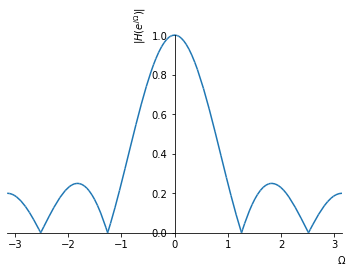

In [1]:
import sympy as sym
%matplotlib inline

N = 5
W = sym.symbols('Omega', real=True)

H = 1/N * (1 - sym.exp(-sym.I*W*N)) / (1 - sym.exp(-sym.I*W))
sym.plot(sym.Abs(H), (W, -sym.pi, sym.pi),
         xlabel=r'$\Omega$', ylabel=r'$|H(e^{j \Omega})|$')

**Exercises**

* Change the length `N` of the rectangular impulse response. How does the transfer function change?
* What overall character does the transfer function show (low-pass, high-pass, band-pass, band-stop)?
* Regarding the transfer function, can you explain the smoothing property of the [moving average filter](../discrete_systems_time_domain/difference_equation.ipynb#Moving-Average)?

### Relation to Differential Equations

Linear difference equations with constant coefficients describing the relation between input $x[k]$ and output $y[k]$ represent an LTI system. In this case a system is characterized by the constants $a_n, b_m \in \mathbb{C}$ of the difference equation

\begin{equation}
\sum_{n = 0}^{N} a_n \; y[k - n] = \sum_{m = 0}^{M} b_m \; x[k -m]
\end{equation}

where $a_N \neq 0$ with $N$ denoting its degree. Initial values are discarded in the following. Applying a two-sided $z$-transform to the left- and right-hand-side and exploiting the [shift theorem](../z_transform/theorems.ipynb#Shift-Theorem) yields

\begin{equation}
Y(z) \sum_{n=0}^{N} a_n z^{-n} = X(z) \sum_{m=0}^{M} b_m z^{-m}
\end{equation}

Rearranging this result derives the transfer function $H(z)$ of the system as

\begin{equation}
H(z) = \frac{Y(z)}{X(z)} = \frac{\sum_{m=0}^{M} b_m z^{-m}}{\sum_{n=0}^{N} a_n z^{-n}}
\end{equation}

The transfer function of an LTI system whose in- and output relation can be characterized by an linear difference equation is given as rational function in $z^{-1}$. The coefficients of its numerator and denominator polynomial are given by the constant coefficients $b_m$ and $a_n$ of the difference equation. The conversion between both representations of an LTI system is therefore straightforward.

Discrete systems may be classified into [recursive and non-recursive systems](../discrete_systems_time_domain/difference_equation.ipynb#Recursive-and-Non-Recursive-Systems). This has implications on the poles and zeros of the transfer function. A

* **non-recursive system** has only zeros since $a_n = 0$ for $n > 0$ and a
* **recursive system** has poles and zeros since at least one $a_n \neq 0$ for $n > 0$.

**Example**

* transfer function for 2nd-order recursive system (analytic, freqz) 

### Determination from Internal Structure

The transfer function $H(s)$ can be determined from the internal structure of an LTI system, if known. Either by derivation of the ODE characterizing the system, as shown above, or by direct analysis of the system in the Laplace/Fourier domain. For passive electrical networks this can be conducted by representing the signals and elements of the network by their complex impedances $Z(s)$ and applying Kirchhoff's circuit laws. This was illustrated for instance by the previous [Laplace domain analysis of a 2nd order low-pass filter](../laplace_transform/network_analysis.ipynb#Example:-Second-Order-Low-Pass-Filter). Similar procedures can be applied to other types of LTI systems, e.g. mechanical systems.

The transfer function is then given as the quotient between the output signal $Y(s)$ and the input signal $X(s)$ in the Laplace/Fourier domain.

### Measurement

This can be used to measure the transfer function of a system by specific input signals that fulfill $X(z) \neq 0$ with $X(z) \approx$ constant.

* next sections

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.